In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, label_binarize

In [2]:
from IPython.display import Image
Image(filename='images/No agua 1997 11 09.jpg', width=900, height=350)


In [3]:
Image(filename='images/agua 1997 11 09.jpg', width=900, height=350)

#### Load data from several files

In [4]:
!head data/rec\ 1a\ validacion\ Vanesa\ B\ 1\ 2\ 3\ 4\ 5\ 7\ \ S_.txt

In [5]:
pd.read_csv('data/rec 1a validacion Vanesa B 1 2 3 4 5 7  S_.txt', 
            index_col=None, header=4, sep=';')

banda 1  banda 2  banda 3  banda 4  banda 5  banda 7  salida
0         0.839    0.918    0.925    0.643    0.808    0.902       0
1         0.937    0.918    0.902    0.663    0.843    0.902       0
2         0.906    0.835    0.902    0.631    1.000    1.000       0
3         0.969    0.835    0.925    0.631    1.000    1.000       0
4         0.969    0.835    0.925    0.631    1.000    1.000       0
5         0.937    0.835    0.925    0.631    1.000    1.000       0
6         0.839    0.835    0.925    0.631    1.000    1.000       0
7         0.937    0.792    0.953    0.608    1.000    1.000       0
8         0.937    0.961    0.925    0.608    1.000    1.000       0
9         1.000    0.875    0.953    0.608    1.000    1.000       0
10        0.969    0.835    0.925    0.608    1.000    1.000       0
11        1.000    0.875    0.976    0.608    1.000    0.969       0
12        1.000    0.875    0.925    0.620    1.000    1.000       0
13        0.937    0.875    0.925    0.620    1.000    0.984       0
14        1.000    0.918    0.925    0.631    1.000    1.000       0
15        0.937    0.918    0.953    0.631    1.000    1.000       0
16        0.969    0.875    0.953    0.631    1.000    1.000       0
17        1.000    0.918    0.925    0.631    1.000    1.000       0
18        0.937    0.875    0.953    0.643    0.984    1.000       0
19        0.937    0.875    0.902    0.631    0.945    1.000       0
20        0.906    0.835    0.902    0.663    0.933    0.937       0
21        0.937    1.000    0.953    0.706    0.851    0.855       0
22        1.000    0.961    0.976    0.663    0.761    0.820       0
23        0.839    0.875    0.902    0.643    0.741    0.804       0
24        0.906    0.792    0.827    0.643    0.741    0.788       0
25        0.710    0.792    0.749    0.631    0.761    0.773       0
26        0.678    0.749    0.749    0.608    0.741    0.773       0
27        0.678    0.749    0.749    0.608    0.741    0.773       0
28        0.741    0.835    0.851    0.576    0.718    0.788       0
29        0.741    0.835    0.851    0.576    0.718    0.788       0
...         ...      ...      ...      ...      ...      ...     ...
999967    0.741    0.624    0.675    0.553    0.741    0.690       0
999968    0.647    0.667    0.651    0.588    0.741    0.706       0
999969    0.678    0.624    0.702    0.565    0.733    0.690       0
999970    0.647    0.584    0.651    0.565    0.718    0.675       0
999971    0.549    0.541    0.675    0.553    0.733    0.690       0
999972    0.580    0.584    0.600    0.565    0.718    0.706       0
999973    0.580    0.541    0.576    0.553    0.725    0.655       0
999974    0.482    0.624    0.600    0.553    0.710    0.675       0
999975    0.612    0.667    0.651    0.565    0.800    0.737       0
999976    0.647    0.667    0.651    0.553    0.808    0.706       0
999977    0.518    0.624    0.600    0.553    0.741    0.675       0
999978    0.710    0.710    0.749    0.588    0.776    0.737       0
999979    0.741    0.710    0.725    0.576    0.741    0.722       0
999980    0.741    0.710    0.702    0.533    0.733    0.690       0
999981    0.710    0.667    0.675    0.545    0.710    0.706       0
999982    0.647    0.541    0.624    0.522    0.733    0.690       0
999983    0.482    0.416    0.424    0.498    0.667    0.557       0
999984    0.388    0.459    0.498    0.498    0.643    0.639       0
999985    0.612    0.624    0.624    0.510    0.710    0.690       0
999986    0.678    0.792    0.749    0.533    0.725    0.788       0
999987    0.776    0.710    0.749    0.553    0.761    0.737       0
999988    0.647    0.624    0.624    0.522    0.694    0.655       0
999989    0.647    0.624    0.624    0.510    0.710    0.675       0
999990    0.678    0.624    0.675    0.565    0.733    0.706       0
999991    0.678    0.624    0.624    0.533    0.725    0.675       0
999992    0.776    0.624    0.675    0.545    0.718    0.690       0
999993

In [6]:
import glob

all_files = glob.glob("data/*.txt")
frame = pd.DataFrame()
list_df = [pd.read_csv(file_, index_col=None, header=4, sep=';') for file_ in all_files]
frame = pd.concat(list_df, axis=0)
assert frame.shape[0] == 2999991

#### Move data to numpy arrays and apply a minmax scaler

In [7]:
X = frame[frame.columns[:-1]].values
y = frame[frame.columns[-1]].values

X_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)
X

array([[0.42 , 0.541, 0.475, 0.914, 0.725, 0.541],
       [0.29 , 0.624, 0.498, 0.827, 0.733, 0.557],
       [0.451, 0.667, 0.624, 0.804, 0.769, 0.706],
       ...,
       [0.094, 0.416, 0.373, 0.741, 0.518, 0.408],
       [0.129, 0.498, 0.4  , 0.729, 0.557, 0.475],
       [0.129, 0.498, 0.373, 0.741, 0.569, 0.475]])

#### Check data structure using dimension reduction techniques

In [8]:
from sklearn.decomposition import PCA 
Xp = PCA(n_components=2, random_state=1).fit_transform(X)
Xp

array([[ 0.15360359, -0.19812278],
       [ 0.15545034, -0.18924912],
       [-0.08558303, -0.23610358],
       ...,
       [ 0.49603713, -0.00925433],
       [ 0.39281339, -0.04536367],
       [ 0.40629198, -0.05966959]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'PC 2')

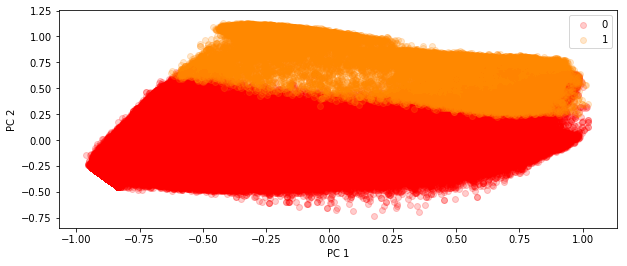

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# get the product class 
pixel_class = np.unique(y)

colors = plt.get_cmap("hsv")

plt.figure(figsize=(10, 4))
for i, p in enumerate(pixel_class):
    mask = (y == p)
    plt.scatter(Xp[mask, 0], Xp[mask, 1], 
                c=colors(1. * i / 11), label=p, alpha=0.2)
    
plt.legend(loc="best")
plt.xlabel('PC 1')
plt.ylabel('PC 2')


### Classification example
#### Split data for training and testing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(Xp, y,
                                                    test_size=0.3,
                                                    random_state=42)

print("X_train.shape -> {}, X_test.shape -> {} ".format(X_train.shape,
                                                        X_test.shape))
print("y_train.shape -> {}, y_test.shape -> {} ".format(y_train.shape,
                                                        y_test.shape))
print(X.min(), X.max())
print(y.min(), y.max())

X_train.shape -> (2099993, 2), X_test.shape -> (899998, 2) 
y_train.shape -> (2099993,), y_test.shape -> (899998,) 
0.0 1.0
0 1


In [ ]:
from sklearn.svm import SVC

sv = SVC(kernel='linear', cache_size=1000, probability=True)
sv.fit(X_train, y_train)

In [ ]:
y_pred = sv.predict(X_test)

#### Evaluate the model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
cv = cross_validation.ShuffleSplit(X.shape[0], n_iter=3, test_size=0.2, random_state=0)
print cross_validation.cross_val_score(net, X, y, cv=cv)

In [ ]:
def plot_matrix(clf, X_test, y_test):
    """Plot Confussion Matrix from a given classifier"""
    plt.clf()
    plt.imshow(confusion_matrix(y_test, clf.predict(X_test)),
               interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
plot_matrix(nets[0], X_test, y_test)

In [ ]:
confusion_matrix(y_test, nets[0].predict(X_test))

### Clustering example

In [ ]:
bandas_cut = pd.read_csv('data/rec 1a validacion Vanesa B 1 2 3 4 5 7  S_.txt', 
                         index_col=None, header=4, sep=';', nrows=10000)

In [ ]:
X = bandas_cut[bandas_cut.columns[:-1]].values
y = bandas_cut[bandas_cut.columns[-1]].values

Xp = PCA(n_components=2).fit_transform(X)
Xp

In [ ]:
import matplotlib.pyplot as plt

# get the product class 
product_class = np.unique(y)

colors = plt.get_cmap("hsv")

plt.figure(figsize=(10, 4))
for i, p in enumerate(product_class):
    mask = (y == p)
    plt.scatter(Xp[mask, 0], Xp[mask, 1], 
                c=colors(1. * i / 11), label=p, alpha=0.2)
    
plt.legend(loc="best")
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [ ]:
from sklearn.cluster import KMeans
from itertools import cycle

kmeans = KMeans(n_clusters=2, random_state=0).fit(Xp)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

plt.figure()
plt.clf()

colors = cycle('rc')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(Xp[my_members, 0], Xp[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

    